In [1]:
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from scipy import stats
import statistics

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import time
# Import the scikitplot module
import scikitplot as skplt

#Book Libraries
from dmba import liftChart, gainsChart,regressionSummary, classificationSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection, adjusted_r2_score, AIC_score, BIC_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score,accuracy_score, roc_curve, auc,roc_auc_score,plot_confusion_matrix,confusion_matrix,r2_score

#Classification 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression,  LinearRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
#Note 1: In the train dataset there is no 'dataset_id' column. We will need to drop it from the test DF.
df_train = pd.read_excel('C:/ADS505/b765dc3d8076-trainset+(1).xlsx')

#Note 1: In the test dataset there is no 'FRAUD_NONFRAUD' column but there is 'dataset_id' column.
df_test = pd.read_excel('C:/ADS505/b765dc3d8076-testset_for_participants.xlsx').drop(columns = ['dataset_id'])

print("The shape of the training data is: ", df_train.shape)
print("The missing values are:")
#Uncomment the line below to see the train missing values.
#print(df_train.isnull().sum(),'\n')

print("The shape of the test data is: ", df_test.shape)
print("The missing values are:")
#Uncomment the line below to see the test NaN values.
df_test.isnull().sum()



The shape of the training data is:  (14000, 24)
The missing values are:
The shape of the test data is:  (6000, 23)
The missing values are:


TRAN_AMT                      0
ACCT_PRE_TRAN_AVAIL_BAL       0
CUST_AGE                      0
OPEN_ACCT_CT                  0
WF_dvc_age                    0
PWD_UPDT_TS                1318
CARR_NAME                  1175
RGN_NAME                   1175
STATE_PRVNC_TXT            1175
ALERT_TRGR_CD                 0
DVC_TYPE_TXT                803
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT        26
CUST_ZIP                      0
CUST_STATE                   22
PH_NUM_UPDT_TS             3036
CUST_SINCE_DT                 0
TRAN_TS                       0
TRAN_DT                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
dtype: int64

In [3]:
#The unique values of the internet service provider name.
unique_values = pd.DataFrame(pd.unique(df_train["CARR_NAME"]))
#There are 555 unique values in this category
#print(len(unique_values))
#Convert the whole dataframe as a string and display it ALL
#display(unique_values.sort_values(by = 0).to_string())
df_train

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,NaN,cellco partnership dba verizon wireless,southwest,california,MOBL,...,CA,7/15/2017 6:58:59,2001-06-05,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud
13996,114.38,0.00,44,10,272,11/2/2017 4:28:20,t-mobile usa inc.,southwest,california,MOBL,...,CO,NaN,2010-06-03,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud
13997,493.00,2848.63,54,3,517,6/3/2021 19:31:15,att services inc,southwest,california,MOBL,...,FL,5/25/2021 8:50:5,1984-10-27,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud
13998,491.64,3163.25,21,3,0,3/2/2020 11:34:54,NaN,NaN,NaN,ONLN,...,CA,NaN,2021-03-01,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud


In [4]:
#Droppimg ACTVY_DT and TRAN_DT since they are redundant to TRAN_TS.
print(df_train[['ACTVY_DT', 'TRAN_DT','TRAN_TS']].head())
df_train = df_train.drop(columns = ['ACTVY_DT', 'TRAN_DT','TRAN_TS'])
print(df_test[['ACTVY_DT', 'TRAN_DT','TRAN_TS']].head())
df_test = df_test.drop(columns = ['ACTVY_DT', 'TRAN_DT','TRAN_TS'])

#Dropping RGN_NAME since it is redundant to STATE_PRVNC_TXT.
df_train = df_train.drop(columns = ['RGN_NAME'])
df_test = df_test.drop(columns = ['RGN_NAME'])

#The columns below were checked and have no variation.
column_values = df_train[['ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'ACTN_CD']].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)
df_train = df_train.drop(columns = ['ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'ACTN_CD'])
df_test = df_test.drop(columns = ['ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'ACTN_CD'])



    ACTVY_DT    TRAN_DT             TRAN_TS
0   5/3/2021   5/3/2021    5/3/2021 18:3:58
1  1/13/2021  1/13/2021  1/13/2021 19:19:37
2   4/8/2021   4/8/2021    4/8/2021 9:42:51
3  8/10/2021  8/10/2021  8/10/2021 15:28:31
4  6/27/2021  6/27/2021  6/27/2021 11:12:44
    ACTVY_DT    TRAN_DT             TRAN_TS
0   1/8/2021   1/8/2021   1/8/2021 11:33:44
1  2/27/2021  2/27/2021    2/27/2021 7:2:31
2  4/22/2021  4/22/2021  4/22/2021 11:25:16
3  6/17/2021  6/17/2021    6/17/2021 11:5:0
4   5/8/2021   5/8/2021    5/8/2021 10:0:51
['P2P_COMMIT' 'P2P' 'SCHPMT']


In [5]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels
df_train['ALERT_TRGR_CD']= label_encoder.fit_transform(df_train['ALERT_TRGR_CD'])
#NaN's in STATE_PRVNC_TXT left on purpose because overseas access would not be a state. Note has 128 unique values.
df_train['STATE_PRVNC_TXT']= label_encoder.fit_transform(df_train['STATE_PRVNC_TXT']) 
#DVC_TYPE_TXT and AUTHC_SCNDRY_STAT_TXT have NaN values less than 30%
df_train['AUTHC_SCNDRY_STAT_TXT']= label_encoder.fit_transform(df_train['AUTHC_SCNDRY_STAT_TXT']) 
df_train['DVC_TYPE_TXT']= label_encoder.fit_transform(df_train['DVC_TYPE_TXT'])
           
df_train['FRAUD_NONFRAUD']= label_encoder.fit_transform(df_train['FRAUD_NONFRAUD'])
df_train['AUTHC_PRIM_TYPE_CD']= label_encoder.fit_transform(df_train['AUTHC_PRIM_TYPE_CD'])
    
#typo for google llc corrected.
df_train['CARR_NAME'] = df_train['CARR_NAME'].replace('google  llc', 'google llc')
#NaN's in CARR_NAME left on purpose to have own label because ISP could be hidden. Some are overseas ISPs.
df_train['CARR_NAME']= label_encoder.fit_transform(df_train['CARR_NAME']) 
df_train['CUST_STATE']= label_encoder.fit_transform(df_train['CUST_STATE']) 

In [6]:
#There is no 6/31/ date, change to 7/1/ (element 1322)
df_train['PWD_UPDT_TS']=df_train['PWD_UPDT_TS'].replace(to_replace ="6/31/", value ="7/01/", regex = True)
#df_train['PWD_UPDT_TS']=df_train['PWD_UPDT_TS'].replace(to_replace ="6/31/2020 16:32:51", value ="7/01/2020 16:32:51")
#df_train['PWD_UPDT_TS']=df_train['PWD_UPDT_TS'].replace(to_replace ="6/31/2020 9:56:55", value ="7/01/2020 9:56:55")
#df_train['PWD_UPDT_TS'][1321]

#Change the password change timestamp (PWD_UPDT_TS) to months since changed.
df_train['PWD_UPDT_TS'] = df_train['PWD_UPDT_TS'].fillna('01/01/1970 0:0:0')

passwordupdated_timestamp = []
for element in df_train.PWD_UPDT_TS:
#    print(element)
    passwordupdated_timestamp.append(pd.to_datetime(element, format='%m/%d/%Y %H:%M:%S').timestamp())
df_train['PWD_UPDT_TS'] = passwordupdated_timestamp 

#Scale the password change timestamp (PWD_UPDT_TS)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train['PWD_UPDT_TS'] = scaler.fit_transform(df_train['PWD_UPDT_TS'].values.reshape(-1,1))

In [7]:
#Change last password change to date customer made account
customersince_timestamp = []
today = pd.Timestamp('now')
for element in df_train.CUST_SINCE_DT: 
    difference = today.year - element.year - ((today.month, today.day) < (element.month, element.day))
    customersince_timestamp.append(difference)
df_train['CUST_SINCE_DT'] = customersince_timestamp 

  



In [8]:
df_train['PH_NUM_UPDT_TS']=df_train['PH_NUM_UPDT_TS'].replace(to_replace ="/0/", value ="/12/",regex= True)
#Change last phone number change to date customer made account
phonenumn_timestamp = []
for index, row in df_train.iterrows():
    #rint(df_train)string != string
    if(row.PH_NUM_UPDT_TS !=row.PH_NUM_UPDT_TS):
        phonenumn_timestamp.append(row.CUST_SINCE_DT)
        #element.PH_NUM_UPDT_TS = element.CUST_SINCE_DT 
    else:
        time = pd.to_datetime(row.PH_NUM_UPDT_TS, format='%m/%d/%Y %H:%M:%S')#timestamp()
        print(time)
        difference = today.year - time.year - ((today.month, today.day) < (time.month, time.day))
        phonenumn_timestamp.append(difference)
df_train['PH_NUM_UPDT_TS'] = phonenumn_timestamp 


2021-02-24 15:55:10
2019-05-05 01:08:39
2019-02-16 06:45:37
2020-05-08 10:27:06
2021-05-18 09:50:05
2018-03-16 16:50:05
2019-07-28 12:04:47
2019-12-06 06:04:06
2017-05-12 10:54:10
2020-07-15 06:50:42
2018-05-01 14:50:05
2019-05-06 06:27:47
2020-06-08 19:45:37
2018-07-20 11:22:46
2020-05-16 19:50:05
2020-02-19 10:02:48
2017-07-11 06:31:17
2020-05-18 12:50:05
2019-04-16 06:45:37
2019-10-10 09:23:20
2019-03-12 13:50:05
2019-07-28 06:45:37
2020-02-13 10:08:17
2018-07-01 18:45:37
2018-09-26 06:21:29
2017-12-05 08:25:31
2019-05-05 14:58:44
2020-01-08 06:45:37
2020-01-08 11:45:37
2020-07-08 14:45:37
2020-07-08 08:45:37
2018-04-23 09:45:37
2017-05-09 14:50:05
2019-07-07 06:05:44
2018-01-21 16:51:01
2020-05-21 23:06:57
2017-05-17 13:57:24
2019-05-01 10:30:02
2020-05-12 06:21:16
2020-07-08 06:45:37
2017-05-08 06:10:51
2021-05-24 16:09:26
2017-05-28 11:50:05
2020-05-07 23:34:43
2020-07-21 06:45:37
2017-05-14 10:14:15
2020-05-22 23:03:13
2020-11-10 11:48:25
2019-05-21 11:13:23
2019-12-02 14:14:59


In [9]:
"""
#Check for high correlation
codes_rgn, uniques_rgn = pd.factorize(df_train['RGN_NAME'])
codes_state, uniques_state = pd.factorize(df_train['STATE_PRVNC_TXT'])                              
np.corrcoef(codes_rgn,codes_state)[1,0]

#Check variance
df_train['ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'ACTN_CD'].var()
"""
df_train.isnull().sum()

TRAN_AMT                   0
ACCT_PRE_TRAN_AVAIL_BAL    0
CUST_AGE                   0
OPEN_ACCT_CT               0
WF_dvc_age                 0
PWD_UPDT_TS                0
CARR_NAME                  0
STATE_PRVNC_TXT            0
ALERT_TRGR_CD              0
DVC_TYPE_TXT               0
AUTHC_PRIM_TYPE_CD         0
AUTHC_SCNDRY_STAT_TXT      0
CUST_ZIP                   0
CUST_STATE                 0
PH_NUM_UPDT_TS             0
CUST_SINCE_DT              0
FRAUD_NONFRAUD             0
dtype: int64

In [10]:


unique_values = pd.unique(df_train["AUTHC_PRIM_TYPE_CD"])
#The unique values of the internet service provider name.
print(unique_values)
#There are 555 unique values in this category
print(len(unique_values))

[4 2 3 1 0]
5


Preprocessing tasks
1. -
2. Change the date since password was change (PWD_UPDT_TS) into days or months or years since last update and drop then it. 
4. Change the remainder data time (DT) categorical encoded values (year, month, day of week, time 24 hour method).
5. Impute values for some columns of NaN values, change other columns NaN into a dummy variable.
6. Do not remove outliers!
7. The CARR_NAME column has 555 unique values, we should use categorical encoding since its a lot of fields but one hot encoding works better.


In [11]:
df_train.isnull().sum()

TRAN_AMT                   0
ACCT_PRE_TRAN_AVAIL_BAL    0
CUST_AGE                   0
OPEN_ACCT_CT               0
WF_dvc_age                 0
PWD_UPDT_TS                0
CARR_NAME                  0
STATE_PRVNC_TXT            0
ALERT_TRGR_CD              0
DVC_TYPE_TXT               0
AUTHC_PRIM_TYPE_CD         0
AUTHC_SCNDRY_STAT_TXT      0
CUST_ZIP                   0
CUST_STATE                 0
PH_NUM_UPDT_TS             0
CUST_SINCE_DT              0
FRAUD_NONFRAUD             0
dtype: int64

In [12]:
print(df_train.info())

#Uncomment below for more df_test specific info.
#df_test, df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 14000 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64
 2   CUST_AGE                 14000 non-null  int64  
 3   OPEN_ACCT_CT             14000 non-null  int64  
 4   WF_dvc_age               14000 non-null  int64  
 5   PWD_UPDT_TS              14000 non-null  float64
 6   CARR_NAME                14000 non-null  int32  
 7   STATE_PRVNC_TXT          14000 non-null  int32  
 8   ALERT_TRGR_CD            14000 non-null  int32  
 9   DVC_TYPE_TXT             14000 non-null  int32  
 10  AUTHC_PRIM_TYPE_CD       14000 non-null  int32  
 11  AUTHC_SCNDRY_STAT_TXT    14000 non-null  int32  
 12  CUST_ZIP                 14000 non-null  int64  
 13  CUST_STATE               14000 non-null  int32  
 14  PH_NUM_UPDT_TS        

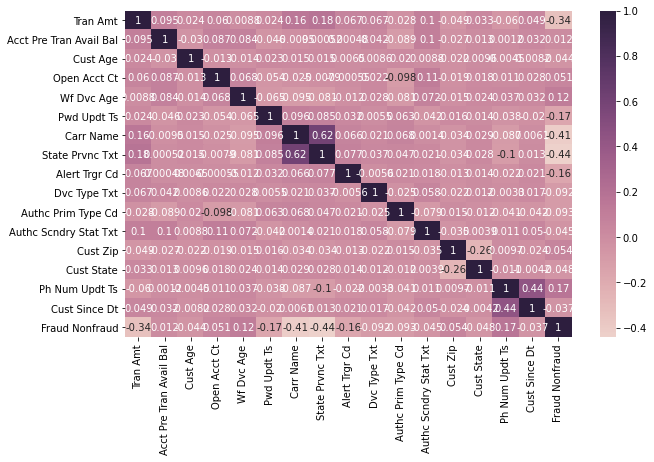

In [13]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_train.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_train.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [14]:

df_train.corr()


,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,FRAUD_NONFRAUD
TRAN_AMT,1.000000,0.095355,0.023688,0.059517,0.008768,0.024224,0.160326,0.183059,0.066776,0.067023,-0.027560,0.102517,-0.048676,0.033170,-0.060039,0.048955,-0.336169
ACCT_PRE_TRAN_AVAIL_BAL,0.095355,1.000000,-0.030382,0.087180,0.083629,-0.045865,-0.009522,0.000517,0.000482,0.041920,-0.089232,0.101859,-0.027318,0.013088,0.001210,0.032078,0.011808
CUST_AGE,0.023688,-0.030382,1.000000,-0.013212,-0.013567,0.023067,0.015183,0.015383,0.006454,0.008598,0.020462,0.008780,-0.022149,0.009614,-0.004503,-0.008203,-0.044426
OPEN_ACCT_CT,0.059517,0.087180,-0.013212,1.000000,0.068204,-0.054267,-0.024850,-0.007871,-0.000547,0.021521,-0.097997,0.111577,-0.018918,0.017719,0.010635,0.028052,0.051024
WF_dvc_age,0.008768,0.083629,-0.013567,0.068204,1.000000,-0.065153,-0.094691,-0.080916,-0.011612,0.028062,-0.080541,0.072239,-0.014835,0.023803,0.036549,0.031539,0.116179
PWD_UPDT_TS,0.024224,-0.045865,0.023067,-0.054267,-0.065153,1.000000,0.096335,0.084805,0.032046,0.005456,0.062617,-0.042427,0.016472,0.014409,-0.038098,-0.020126,-0.166735
CARR_NAME,0.160326,-0.009522,0.015183,-0.024850,-0.094691,0.096335,1.000000,0.615832,0.065798,0.020933,0.068486,0.001382,-0.033502,0.028653,-0.086813,0.006095,-0.413628
STATE_PRVNC_TXT,0.183059,0.000517,0.015383,-0.007871,-0.080916,0.084805,0.615832,1.000000,0.076880,0.037017,0.046834,0.020702,-0.033890,0.028095,-0.099706,0.013094,-0.440947
ALERT_TRGR_CD,0.066776,0.000482,0.006454,-0.000547,-0.011612,0.032046,0.065798,0.076880,1.000000,-0.005648,0.020841,0.018085,-0.013412,0.014067,-0.021542,0.021487,-0.162125
DVC_TYPE_TXT,0.067023,0.041920,0.008598,0.021521,0.028062,0.005456,0.020933,0.037017,-0.005648,1.000000,-0.025011,0.058198,-0.022284,0.011634,-0.003256,0.017283,-0.091681


C:\Users\elfek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elfek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elfek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

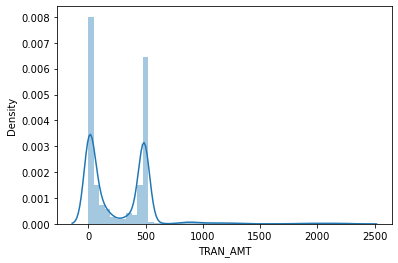

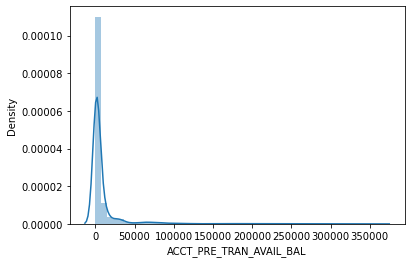

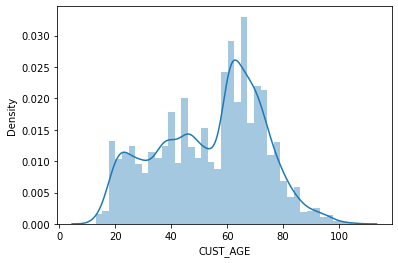

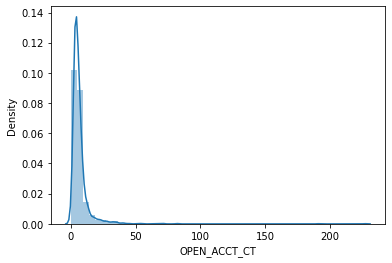

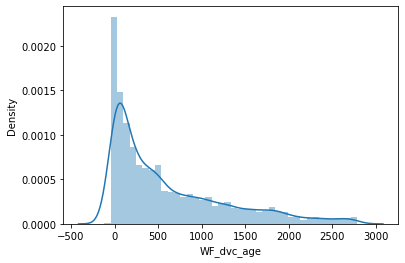

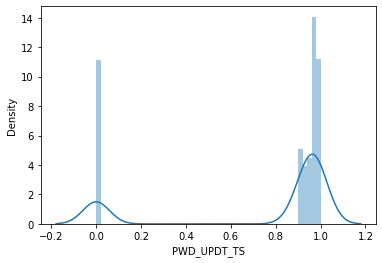

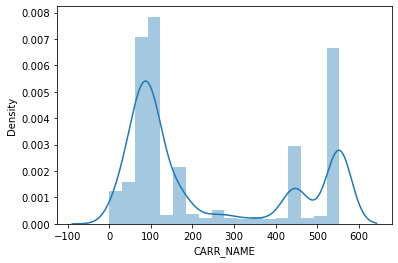

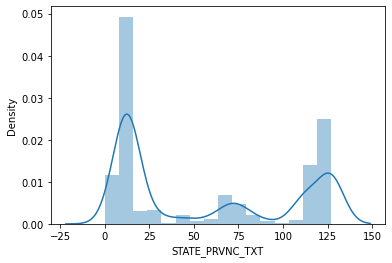

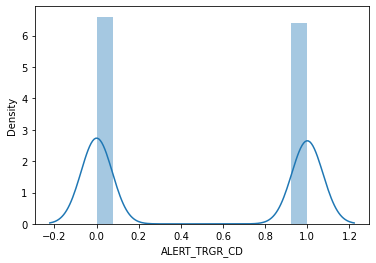

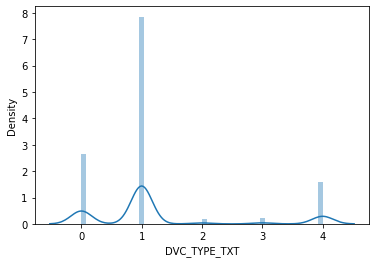

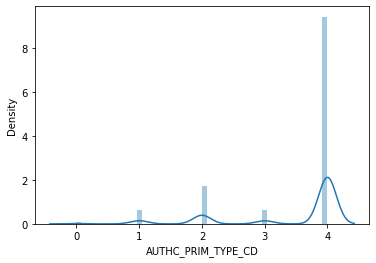

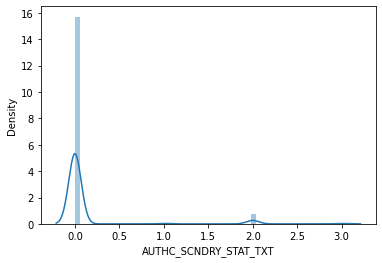

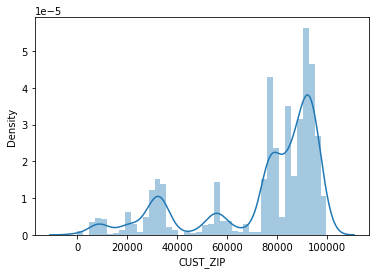

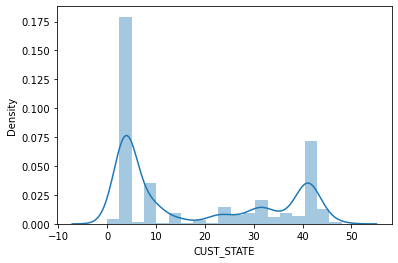

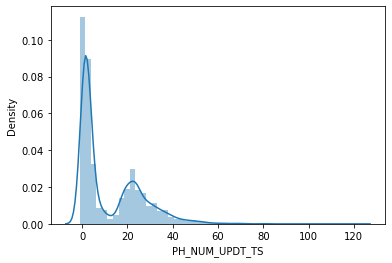

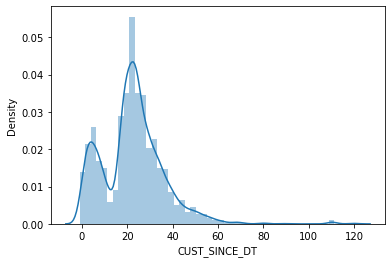

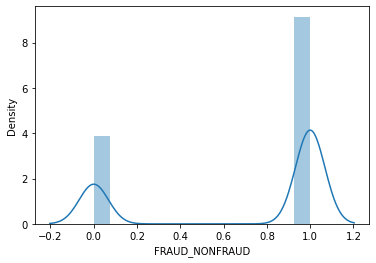

In [15]:
# create distplots
for column in df_train.columns:
    plt.figure()            
    sns.distplot(df_train[column])

In [16]:
df_train.var()

TRAN_AMT                   1.010555e+05
ACCT_PRE_TRAN_AVAIL_BAL    8.980483e+08
CUST_AGE                   3.545627e+02
OPEN_ACCT_CT               8.207307e+01
WF_dvc_age                 4.463756e+05
PWD_UPDT_TS                1.606306e-01
CARR_NAME                  4.005319e+04
STATE_PRVNC_TXT            2.425884e+03
ALERT_TRGR_CD              2.499561e-01
DVC_TYPE_TXT               1.383425e+00
AUTHC_PRIM_TYPE_CD         9.146973e-01
AUTHC_SCNDRY_STAT_TXT      2.252957e-01
CUST_ZIP                   6.224054e+08
CUST_STATE                 2.586172e+02
PH_NUM_UPDT_TS             1.946436e+02
CUST_SINCE_DT              1.902500e+02
FRAUD_NONFRAUD             2.089797e-01
dtype: float64

## I didn't use the Iterative Imputer yet. This is a place holder.

In [17]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_train)
#np.round(imp.transform(dfdropped))
newdf_train = pd.DataFrame(data=imp.transform(df_train))
newdf_train.columns = df_train.columns
newdf_train

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47.0,4.0,2777.0,0.923930,117.0,71.0,0.0,4.0,4.0,0.0,89002.0,32.0,0.0,28.0,1.0
1,65.19,0.00,45.0,5.0,2721.0,0.000000,72.0,13.0,0.0,4.0,2.0,0.0,94541.0,4.0,50.0,50.0,1.0
2,54.84,34570.63,36.0,8.0,1531.0,0.999539,505.0,115.0,1.0,0.0,4.0,0.0,21811.0,20.0,2.0,27.0,0.0
3,0.01,0.00,62.0,3.0,835.0,0.963569,446.0,13.0,0.0,1.0,4.0,0.0,89822.0,32.0,2.0,19.0,1.0
4,497.08,12725.18,81.0,2.0,1095.0,0.980639,94.0,112.0,0.0,1.0,4.0,2.0,84108.0,42.0,1.0,34.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55.0,4.0,142.0,0.000000,68.0,13.0,0.0,1.0,4.0,0.0,92503.0,4.0,4.0,20.0,1.0
13996,114.38,0.00,44.0,10.0,272.0,0.919966,446.0,13.0,0.0,1.0,2.0,0.0,80478.0,5.0,11.0,11.0,1.0
13997,493.00,2848.63,54.0,3.0,517.0,0.988922,32.0,13.0,0.0,0.0,4.0,0.0,33579.0,9.0,0.0,36.0,0.0
13998,491.64,3163.25,21.0,3.0,0.0,0.964789,553.0,127.0,1.0,0.0,4.0,0.0,91702.0,4.0,0.0,0.0,0.0


In [18]:
import imblearn
from imblearn.over_sampling import SMOTE
# transform the dataset
X = df_train.drop(columns = ['FRAUD_NONFRAUD'])
y = df_train['FRAUD_NONFRAUD']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

raw_scaler = StandardScaler()
raw_scaler.fit(X)
X_scaled = raw_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=.7)

In [19]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 1000, random_state = 12345)
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Neural Network (using scaler inputs) f1 score: ", f1)

logistic = LogisticRegressionCV(cv=5, penalty = 'l2', solver = 'liblinear',tol=1e-5,max_iter=1000,Cs=10, random_state = 12345)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Logistic Regression (using scaler inputs) f1 score: ", f1)

SVM = svm.LinearSVC(max_iter = 5000, penalty = 'l2', loss = 'hinge', random_state = 12345)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("SVM (using scaler inputs) f1 score: ", f1)


gb_classif = GradientBoostingClassifier()
gb_classif.fit(X_train, y_train)
y_pred = gb_classif.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("GradientBoosting (using scaler inputs) f1 score: ", f1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Naive Bayes (using scaler inputs) f1 score: ", f1)

logistic = LogisticRegressionCV(cv=5, penalty = 'l2', solver = 'liblinear',tol=1e-3,max_iter=1000,Cs=10, random_state = 12345)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Logistic Regression f1 score: ", f1)
#print("Logistic Regression accuracy: ", round(logistic.score(X_test, y_test), 3))

knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("KNN f1 score: ", f1)

Neural Network (using scaler inputs) f1 score:  0.881
Logistic Regression (using scaler inputs) f1 score:  0.8


C:\Users\elfek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM (using scaler inputs) f1 score:  0.826
GradientBoosting (using scaler inputs) f1 score:  0.952
Naive Bayes (using scaler inputs) f1 score:  0.826
Logistic Regression f1 score:  0.8
KNN f1 score:  0.872


In [20]:
rf = RandomForestClassifier(max_depth=2, random_state = 12345)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Random Forest f1 score: ", f1)

adaboost = AdaBoostClassifier(n_estimators=100, random_state = 12345)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro'), 3)
print("Adaboost f1 score: ", f1)

Random Forest f1 score:  0.881
Adaboost f1 score:  0.954
